# Practical - 6 : Analyze social network structure using Facebook page-page network. Identify clusters and calculate modularity.


In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
G = nx.read_edgelist('facebook_combined.txt', create_using=nx.Graph(), nodetype=int)

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 4039
Number of edges: 88234


In [ ]:
pip install python-louvain

In [ ]:
import community as community_louvain

# Perform community detection
partition = community_louvain.best_partition(G)

# Add community as node attribute
nx.set_node_attributes(G, partition, 'community')

# Total number of communities
num_communities = len(set(partition.values()))
print("Detected communities:", num_communities)


Detected communities: 14


In [ ]:
modularity_score = community_louvain.modularity(partition, G)
print("Modularity of the network:", modularity_score)

Modularity of the network: 0.8348864737116355


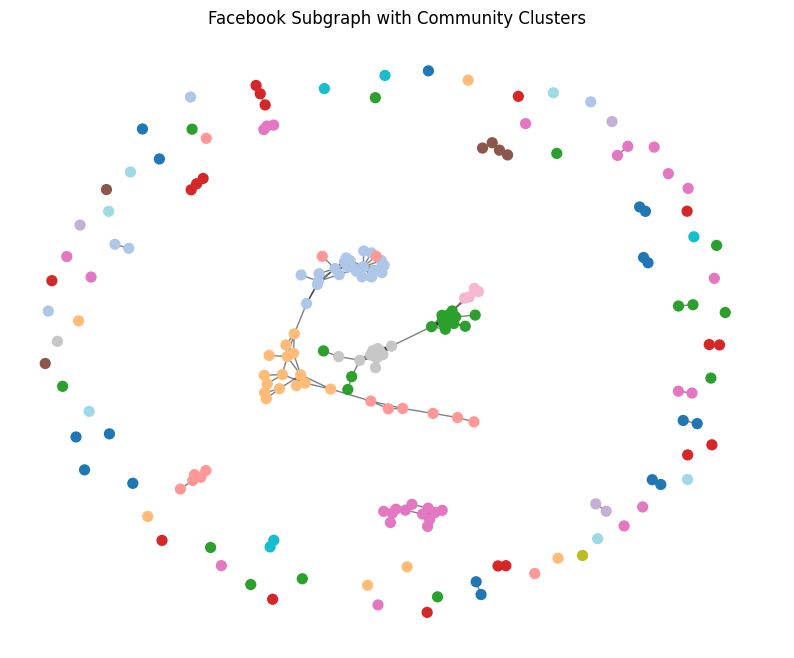

In [ ]:
import matplotlib.cm as cm
import random

# Sample 200 nodes for visualization (Facebook graph is large)
sample_nodes = random.sample(list(G.nodes()), 200)
subgraph = G.subgraph(sample_nodes)

# Assign colors by community
colors = [partition[node] for node in subgraph.nodes()]

# Plot
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(subgraph, seed=42)
nx.draw_networkx_nodes(subgraph, pos, node_size=50, cmap=cm.tab20, node_color=colors)
nx.draw_networkx_edges(subgraph, pos, alpha=0.5)
plt.title("Facebook Subgraph with Community Clusters")
plt.axis('off')
plt.show()